# Model Comparison on New TEP Dataset

This notebook compares all trained models on the newly generated independent TEP dataset.

**Models Compared**:
- Multiclass: XGBoost, LSTM, LSTM-FCN, CNN-Transformer, TransKal
- Binary: LSTM-Autoencoder, Conv-Autoencoder

**Purpose**: Summarize generalization performance across all models.

## Configuration & Imports

In [1]:
import os
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

METRICS_DIR = Path('../outputs/metrics')
FIGURES_DIR = Path('../outputs/figures')

QUICK_MODE = os.environ.get('QUICK_MODE', '').lower() in ('true', '1', 'yes')
FILE_SUFFIX = '_quick' if QUICK_MODE else ''

print('='*60)
print('Model Comparison on New TEP Dataset')
if QUICK_MODE:
    print('QUICK MODE')
print('='*60)

Model Comparison on New TEP Dataset


## Load All Evaluation Metrics

In [2]:
print('\nLoading evaluation metrics...')

multiclass_models = ['xgboost', 'lstm', 'lstm_fcn', 'cnn_transformer', 'transkal']
binary_models = ['lstm_autoencoder', 'conv_autoencoder']

multiclass_metrics = {}
binary_metrics = {}

for model in multiclass_models:
    metrics_file = METRICS_DIR / f'{model}_new_eval_metrics{FILE_SUFFIX}.json'
    if metrics_file.exists():
        with open(metrics_file) as f:
            multiclass_metrics[model] = json.load(f)
        print(f'  Loaded {model}')
    else:
        print(f'  Missing {model}')

for model in binary_models:
    metrics_file = METRICS_DIR / f'{model}_new_eval_metrics{FILE_SUFFIX}.json'
    if metrics_file.exists():
        with open(metrics_file) as f:
            binary_metrics[model] = json.load(f)
        print(f'  Loaded {model}')
    else:
        print(f'  Missing {model}')

print(f'\nLoaded: {len(multiclass_metrics)} multiclass, {len(binary_metrics)} binary')


Loading evaluation metrics...
  Loaded xgboost
  Loaded lstm
  Loaded lstm_fcn
  Loaded cnn_transformer
  Loaded transkal
  Loaded lstm_autoencoder
  Loaded conv_autoencoder

Loaded: 5 multiclass, 2 binary


## Multiclass Model Comparison

In [3]:
print('\nMulticlass Model Comparison (New Evaluation Dataset):')
print('='*90)

rows = []
for model, metrics in multiclass_metrics.items():
    rows.append({
        'Model': metrics['model'],
        'Accuracy': metrics['accuracy'],
        'Balanced Acc': metrics['balanced_accuracy'],
        'F1 (weighted)': metrics['f1_weighted'],
        'F1 (macro)': metrics['f1_macro'],
        'Orig Accuracy': metrics['comparison_with_original']['original_accuracy'],
        'Delta': metrics['comparison_with_original']['accuracy_delta']
    })

df_multi = pd.DataFrame(rows)
df_multi = df_multi.sort_values('Accuracy', ascending=False)
print(df_multi.to_string(index=False))

# Save
df_multi.to_csv(METRICS_DIR / f'multiclass_comparison_new_eval{FILE_SUFFIX}.csv', index=False)


Multiclass Model Comparison (New Evaluation Dataset):
          Model  Accuracy  Balanced Acc  F1 (weighted)  F1 (macro)  Orig Accuracy     Delta
CNN-Transformer  0.994936      0.995413       0.994967    0.995441       0.991968  0.002968
           LSTM  0.991077      0.991918       0.991143    0.991978       0.991377 -0.000300
       LSTM-FCN  0.986878      0.988116       0.987077    0.988151       0.993688 -0.006810
        XGBoost  0.886849      0.888624       0.890897    0.892511       0.939131 -0.052283
       TransKal  0.872082      0.882102       0.840308    0.854326       0.990851 -0.118769


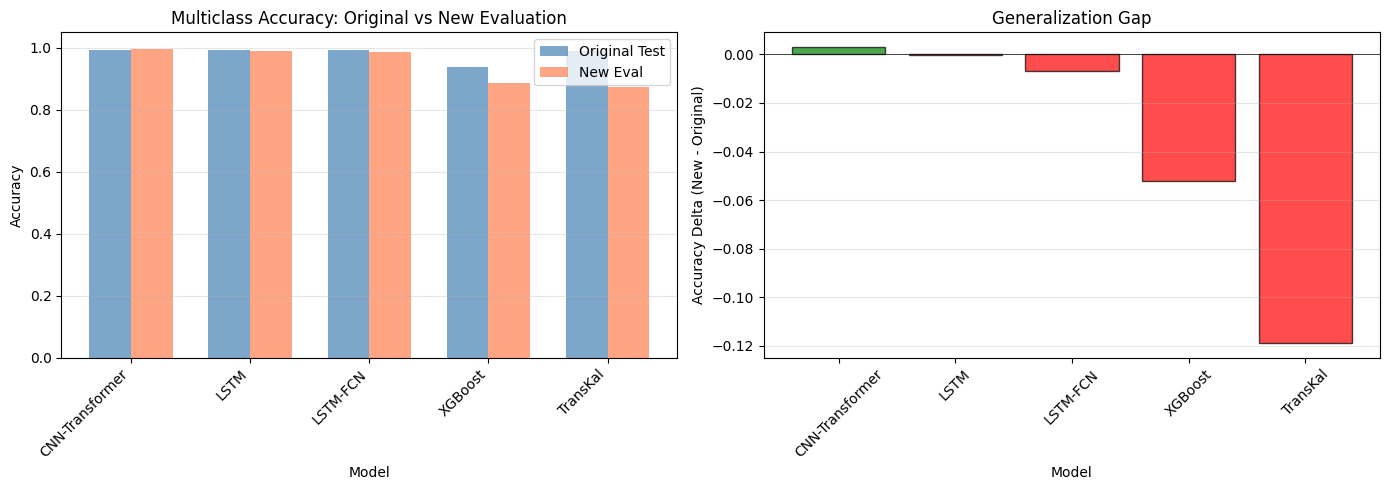

Saved to ../outputs/figures/multiclass_comparison_new_eval.png


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: Accuracy comparison
ax = axes[0]
models = df_multi['Model'].tolist()
orig_acc = df_multi['Orig Accuracy'].tolist()
new_acc = df_multi['Accuracy'].tolist()

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, orig_acc, width, label='Original Test', color='steelblue', alpha=0.7)
bars2 = ax.bar(x + width/2, new_acc, width, label='New Eval', color='coral', alpha=0.7)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Multiclass Accuracy: Original vs New Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1.05)
ax.grid(axis='y', alpha=0.3)

# Delta plot
ax = axes[1]
deltas = df_multi['Delta'].tolist()
colors = ['green' if d >= 0 else 'red' for d in deltas]
ax.bar(models, deltas, color=colors, edgecolor='black', alpha=0.7)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Delta (New - Original)')
ax.set_title('Generalization Gap')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
output_file = FIGURES_DIR / f'multiclass_comparison_new_eval{FILE_SUFFIX}.png'
plt.savefig(output_file, dpi=150, bbox_inches='tight')
plt.show()
print(f'Saved to {output_file}')

## Binary Model Comparison

In [5]:
print('\nBinary Model Comparison (New Evaluation Dataset):')
print('='*80)

if binary_metrics:
    rows = []
    for model, metrics in binary_metrics.items():
        rows.append({
            'Model': metrics['model'],
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1': metrics.get('f1_binary', metrics.get('f1', 0)),
            'AUC-ROC': metrics.get('roc_auc', metrics.get('auc_roc', 0)),
            'Orig Accuracy': metrics['comparison_with_original']['original_accuracy'],
            'Delta': metrics['comparison_with_original']['accuracy_delta']
        })

    df_binary = pd.DataFrame(rows)
    df_binary = df_binary.sort_values('F1', ascending=False)
    print(df_binary.to_string(index=False))
    
    df_binary.to_csv(METRICS_DIR / f'binary_comparison_new_eval{FILE_SUFFIX}.csv', index=False)
else:
    print('No binary model metrics available.')


Binary Model Comparison (New Evaluation Dataset):
           Model  Accuracy  Precision   Recall       F1  AUC-ROC  Orig Accuracy     Delta
LSTM-Autoencoder  0.922170   0.912436 0.969044 0.939888 0.976993       0.969588 -0.047418
Conv-Autoencoder  0.627725   0.627725 1.000000 0.771292 0.975883       0.993908 -0.366182


## Summary

In [6]:
print('\n' + '='*60)
print('MODEL COMPARISON SUMMARY - NEW TEP DATASET')
if QUICK_MODE:
    print('(Quick mode)')
print('='*60)

if multiclass_metrics:
    best_multi = max(multiclass_metrics.items(), key=lambda x: x[1]['accuracy'])
    print(f'\nBest Multiclass Model: {best_multi[1]["model"]}')
    print(f'  Accuracy: {best_multi[1]["accuracy"]:.4f}')
    print(f'  F1 (weighted): {best_multi[1]["f1_weighted"]:.4f}')
    print(f'  Generalization gap: {best_multi[1]["comparison_with_original"]["accuracy_delta"]:+.4f}')

if binary_metrics:
    best_binary = max(binary_metrics.items(), key=lambda x: x[1].get('f1_binary', x[1].get('f1', 0)))
    f1_val = best_binary[1].get('f1_binary', best_binary[1].get('f1', 0))
    auc_val = best_binary[1].get('roc_auc', best_binary[1].get('auc_roc', 0))
    print(f'\nBest Binary Model: {best_binary[1]["model"]}')
    print(f'  F1: {f1_val:.4f}')
    print(f'  AUC-ROC: {auc_val:.4f}')

print('\nOutputs:')
print(f'  - {METRICS_DIR / f"multiclass_comparison_new_eval{FILE_SUFFIX}.csv"}')
if binary_metrics:
    print(f'  - {METRICS_DIR / f"binary_comparison_new_eval{FILE_SUFFIX}.csv"}')
print(f'  - {FIGURES_DIR / f"multiclass_comparison_new_eval{FILE_SUFFIX}.png"}')
print('='*60)


MODEL COMPARISON SUMMARY - NEW TEP DATASET

Best Multiclass Model: CNN-Transformer
  Accuracy: 0.9949
  F1 (weighted): 0.9950
  Generalization gap: +0.0030

Best Binary Model: LSTM-Autoencoder
  F1: 0.9399
  AUC-ROC: 0.9770

Outputs:
  - ../outputs/metrics/multiclass_comparison_new_eval.csv
  - ../outputs/metrics/binary_comparison_new_eval.csv
  - ../outputs/figures/multiclass_comparison_new_eval.png
